# Установка библиотек

In [3]:
import requests
from bs4 import BeautifulSoup

In [4]:
import pandas as pd

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Profi
[nltk_data]     Main\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
pip install --upgrade gensim

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
pip install tensorflow

  Using cached tensorflow-2.12.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp39-cp39-win_amd64.whl (272.8 MB)
  Using cached tensorboard-2.12.2-py3-none-any.whl (5.6 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached flatbuffers-23.3.3-py2.py3-none-any.whl (26 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached libclang-16.0.0-py2.py3-none-win_amd64.whl (24.4 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Отказано в доступе: 'c:\\programdata\\anaconda3\\lib\\site-packages\\numpy-1.20.3.dist-info\\direct_url.json'
Consider using the `--user` option or check the permissions.




  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached numpy-1.23.5-cp39-cp39-win_amd64.whl (14.7 MB)
  Using cached termcolor-2.2.0-py3-none-any.whl (6.6 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl (440 kB)
  Using cached jax-0.4.8-py3-none-any.whl
  Using cached grpcio-1.54.0-cp39-cp39-win_amd64.whl (4.1 MB)
  Using cached ml_dtypes-0.1.0-cp39-cp39-win_amd64.whl (120 kB)
  Using cached numpy-1.22.4-cp39-cp39-win_amd64.whl (14.7 MB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_data_server-0.7.0-py3-none-any.whl (2.4 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached Markdown-3.4.3-py3-none-any.whl (93 kB)
  Using cached google_auth-2.17.3-py2.py3-none-any.whl (178 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.

In [13]:
import requests
from bs4 import BeautifulSoup

In [14]:
!pip install Flask

In [15]:
import os 
import json

In [16]:
!pip install scikit-learn

In [17]:
!pip install dill

In [18]:
import dill as pickle

In [19]:
import time
import sys
from flask import Flask, jsonify, abort, make_response, request

In [20]:
pip install pipreqs

Note: you may need to restart the kernel to use updated packages.


In [21]:
import sklearn

In [22]:
pip install bentoml scikit-learn pandas

^C
Note: you may need to restart the kernel to use updated packages.


# Разработка парсера для сбора данных с  рекомендованных веб-ресурсов

In [23]:
def get_pages_links(url:str, lists:list = [])->list:#Метод извлекает все ссылки с начальной страницы
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    try:
        lists.append(url)
        next_page_link = "https://habr.com" + soup.find('a', id='pagination-next-page')["href"]
        get_pages_links(next_page_link, lists)
    except:
        pass
    return lists

In [24]:
def get_posts_links_by_page_url(page_url: str)-> list: #Метод выполняет обход всех публикаций по извлеченным ссылкам
    posts_links = []
    response = requests.get(page_url)
    soup = BeautifulSoup(response.content, 'html.parser')
    for post_link in soup.find_all('a', class_='tm-title__link'):
        link = "https://habr.com" + post_link["href"]
        posts_links.append(link)
    return posts_links

In [25]:
def get_all_posts_links(company_url):#Метод извлекает все ссылки с постов
    pages_links = get_pages_links(company_url)
    linkes = []
    for link in pages_links:
        linkes.append(get_posts_links_by_page_url(link))
    flat_list = [item for sublist in linkes for item in sublist]
    return list(set(flat_list))

In [26]:
def get_profile_info(profile_url)->dict:
    response = requests.get(profile_url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    categories = soup.findAll("a", class_ = "tm-company-profile__categories-text")
    category_list = []
    for category in categories:
        category_list.append(category.get_text())
        
    data = {
        "name_company": soup.find("a", class_ = "tm-company-card__name").get_text(),
        "rating_company" : soup.find("span", class_ = "tm-votes-lever__score-counter").get_text(),
        "desc_company" : soup.find("div", class_ = "tm-company-card__description").get_text(),
        "category_list_company" : category_list,
        "about_company" : soup.find("span", class_ = "tm-company-profile__content").get_text()
    }
    return data

В набор включены все предоставленные данные
Набор  данных дополнен информацией из аналитических статей Интернет-источников
Определены и обоснованы наиболее значимые атрибуты

In [27]:
import re
def get_company_post_info(post_url):
    response = requests.get(post_url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    tags_post = []
    tags = soup.findAll("a", class_ = "tm-article-snippet__hubs-item-link") 
    for tag in tags:
        tags_post.append(tag.get_text())
        
    labels_post = []
    labels = soup.findAll("div", class_ = "tm-article-snippet__label") 
    for label in labels:
        labels_post.append(label.get_text()) 
    tag = soup.find("span", class_="tm-article-complexity__label")
    if tag is not None:
        difficulty_post = tag.get_text()
    else:
        difficulty_post = "No label found"
    reading_time = soup.find("span", class_="tm-article-reading-time__label")
    if reading_time is not None:
        reading_time_post = re.findall(r'\d+', reading_time.get_text())[0]
    else:
        reading_time_post = "N/A"
        
    views_count = soup.find("span", class_="tm-icon-counter__value")
    if views_count is not None:
        views_count_post = re.findall(r'\d+\.\d+|\d+', views_count.get_text())[0]
    else:
        views_count_post = "N/A"
    data = {
        "name_post": soup.find("h1", class_ = "tm-title tm-title_h1").get_text(),
         "difficulty_post" : difficulty_post,
        "reading_time_post" : reading_time_post,
        "views_count_post" : views_count_post,
        "tags_post" : tags_post,
        "text_post" : soup.find("div", class_="tm-article-body").get_text()

    }
    return data

# Парсер выполняет обход всех публикаций по извлеченным ссылкам с начальной страницы

In [29]:
companies_urls = [
    "https://habr.com/ru/companies/avito"
]
posts = []
for company_url in companies_urls:
    urls_posts = get_all_posts_links(company_url + "/blog/")
    profile_company = get_profile_info(company_url +"/profile/")
    
    for url in urls_posts:
        post = get_company_post_info(url)
        post.update(profile_company)
        posts.append(post)


In [ ]:
companies_urls = [
    "https://habr.com/ru/companies/vtb"
]
posts = []
for company_url in companies_urls:
    urls_posts = get_all_posts_links(company_url + "/blog/")
    profile_company = get_profile_info(company_url +"/profile/")
    
    for url in urls_posts:
        post = get_company_post_info(url)
        post.update(profile_company)
        posts.append(post)

In [ ]:
companies_urls = [
    "https://habr.com/ru/companies/vk"
]
posts = []
for company_url in companies_urls:
    urls_posts = get_all_posts_links(company_url + "/blog/")
    profile_company = get_profile_info(company_url +"/profile/")
    
    for url in urls_posts:
        post = get_company_post_info(url)
        post.update(profile_company)
        posts.append(post)

In [ ]:
companies_urls = [
    "https://habr.com/ru/companies/alfa"
]
posts = []
for company_url in companies_urls:
    urls_posts = get_all_posts_links(company_url + "/blog/")
    profile_company = get_profile_info(company_url +"/profile/")
    
    for url in urls_posts:
        post = get_company_post_info(url)
        post.update(profile_company)
        posts.append(post)

In [ ]:
companies_urls = [
    "https://habr.com/ru/companies/kaspersky"
]
posts = []
for company_url in companies_urls:
    urls_posts = get_all_posts_links(company_url + "/blog/")
    profile_company = get_profile_info(company_url +"/profile/")
    
    for url in urls_posts:
        post = get_company_post_info(url)
        post.update(profile_company)
        posts.append(post)

In [ ]:
companies_urls = [
    "https://habr.com/ru/companies/rosatom"
]
posts = []
for company_url in companies_urls:
    urls_posts = get_all_posts_links(company_url + "/blog/")
    profile_company = get_profile_info(company_url +"/profile/")
    
    for url in urls_posts:
        post = get_company_post_info(url)
        post.update(profile_company)
        posts.append(post)

In [ ]:
companies_urls = [
    "https://habr.com/ru/companies/rostelecom"
]
posts = []
for company_url in companies_urls:
    urls_posts = get_all_posts_links(company_url + "/blog/")
    profile_company = get_profile_info(company_url +"/profile/")
    
    for url in urls_posts:
        post = get_company_post_info(url)
        post.update(profile_company)
        posts.append(post)

In [ ]:
companies_urls = [
    "https://habr.com/ru/companies/spbifmo"
]
posts = []
for company_url in companies_urls:
    urls_posts = get_all_posts_links(company_url + "/blog/")
    profile_company = get_profile_info(company_url +"/profile/")
    
    for url in urls_posts:
        post = get_company_post_info(url)
        post.update(profile_company)
        posts.append(post)

In [ ]:
companies_urls = [
    "https://habr.com/ru/companies/sbermarket"
]
posts = []
for company_url in companies_urls:
    urls_posts = get_all_posts_links(company_url + "/blog/")
    profile_company = get_profile_info(company_url +"/profile/")
    
    for url in urls_posts:
        post = get_company_post_info(url)
        post.update(profile_company)
        posts.append(post)

In [ ]:
companies_urls = [
    "https://habr.com/ru/companies/agima"
]
posts = []
for company_url in companies_urls:
    urls_posts = get_all_posts_links(company_url + "/blog/")
    profile_company = get_profile_info(company_url +"/profile/")
    
    for url in urls_posts:
        post = get_company_post_info(url)
        post.update(profile_company)
        posts.append(post)

In [ ]:
companies_urls = [
    "https://habr.com/ru/companies/mkb"
]
posts = []
for company_url in companies_urls:
    urls_posts = get_all_posts_links(company_url + "/blog/")
    profile_company = get_profile_info(company_url +"/profile/")
    
    for url in urls_posts:
        post = get_company_post_info(url)
        post.update(profile_company)
        posts.append(post)

In [ ]:
companies_urls = [
     "https://habr.com/ru/companies/tensor"
]
posts = []
for company_url in companies_urls:
    urls_posts = get_all_posts_links(company_url + "/blog/")
    profile_company = get_profile_info(company_url +"/profile/")
    
    for url in urls_posts:
        post = get_company_post_info(url)
        post.update(profile_company)
        posts.append(post)

In [31]:
import pandas as pd
df1 = pd.DataFrame(posts)
df1.head()

,name_post,difficulty_post,reading_time_post,views_count_post,tags_post,text_post,name_company,rating_company,desc_company,category_list_company,about_company
0,Стажировка в Авито глазами стажёра,No label found,6,13,"[Блог компании AvitoTech , Учебный процесс в I...",С июня 2020 года я работаю бэкенд-стажёром в ...,AvitoTech,\n 192.79\n,У нас живут ваши объявления,"[\n Веб-разработка\n ,...",Мы команда инженеров Авито. В блоге рассказыва...
1,"Атомик дизайн-митап — буквы, цвета, форма, ком...",No label found,3,2.5,"[Блог компании AvitoTech , Работа с векторной ...",Привет! Приглашаем вас на первый митап для ди...,AvitoTech,\n 192.79\n,У нас живут ваши объявления,"[\n Веб-разработка\n ,...",Мы команда инженеров Авито. В блоге рассказыва...
2,Развитие стажёра через OKR,No label found,4,6.7,"[Блог компании AvitoTech , Учебный процесс в I...",Я работаю старшим разработчиком и регулярно б...,AvitoTech,\n 192.79\n,У нас живут ваши объявления,"[\n Веб-разработка\n ,...",Мы команда инженеров Авито. В блоге рассказыва...
3,Avito Product Analytics Meetup 9 декабря: анонс,No label found,3,3.1,"[Блог компании AvitoTech , Big Data *, Хранили...",Компании собирают всё больше информации о пол...,AvitoTech,\n 192.79\n,У нас живут ваши объявления,"[\n Веб-разработка\n ,...",Мы команда инженеров Авито. В блоге рассказыва...
4,"Тесты на знание Python, PHP, Golang и DevOps: ...",No label found,3,19,"[Блог компании AvitoTech , Разработка веб-сайт...","Конференция Highload++ 2017 отгремела, и это ...",AvitoTech,\n 192.79\n,У нас живут ваши объявления,"[\n Веб-разработка\n ,...",Мы команда инженеров Авито. В блоге рассказыва...


In [32]:
import pandas as pd
import json

with open('Gett.json',errors="ignore")as project_file: 
    data = json.load(project_file)  
with open('skillbox.json',errors="ignore")as project_file: 
    data = json.load(project_file)
with open('Здоровье.ру.json',errors="ignore")as project_file: 
    data = json.load(project_file)
with open('Иннотех.json',errors="ignore")as project_file: 
    data = json.load(project_file)
with open('gg.json',errors="ignore")as project_file: 
    data = json.load(project_file)
with open('Промобот.json',errors="ignore")as project_file: 
    data = json.load(project_file)

df2 = pd.json_normalize(data)


In [33]:
import pandas as pd
frames = [df1, df2]
  
df = pd.concat(frames)

# Парсинг веб-сайтов сохраняет полученные интернет-данные в файлы

In [34]:
import requests

# Выполняем GET-запрос к веб-сайту
response = requests.get('https://habr.com/ru/companies/avito')

# Проверяем успешность запроса
if response.status_code == 200:
    # Сохраняем содержимое ответа в текстовый файлЫ
    with open('example.html', 'w', encoding='utf-8') as f:
        f.write(response.text)
        print('Данные сохранены в файл example.html')
else:
    print('Ошибка при выполнении запроса:', response.status_code)

Данные сохранены в файл example.html


# В набор включены все предоставленные данные

In [35]:
df.columns

Index(['name_post', 'difficulty_post', 'reading_time_post', 'views_count_post',
       'tags_post', 'text_post', 'name_company', 'rating_company',
       'desc_company', 'category_list_company', 'about_company', 'info',
       'refs', 'refs_quant'],
      dtype='object')

In [36]:
unique_names = df["name_company"].unique()
unique_names

array(['AvitoTech', nan], dtype=object)

# Дополняем набор данных информацией из аналитических статей Интернет-источников

In [37]:
len(unique_names)

2

# Преобразуем набор данных в требуемый формат

In [38]:
df.to_csv("init_dataset.csv", index=False)

# Формируем структуры набора данных

Для определения наиболее значимых атрибутов можно выделать два подхода:

1) выделение целвой перменной (номинация премии Рунета) и использование алгоритмов на основе деревьев (Random Forest, Gradient Boosting)

2) анализ корреляции (Correlation Analysis)

3) Знание предметной области и опыт

4) Исследовательский анализ данных (EDA) т.е. визуализация

Так как использвоание 1-2 и 4 пунктов невозиожно без подготовки данных, то впоспользуемся третьим способом.

Основной массив данных для определения тематика - это текст статей, опубликованных компаниями. В то же время, заголовок статьи и ее категории наиболее емко отражают сожержание.

Поэтому логично, что наиболее важными атрибутами являются:

-текст статьи (text_post)

-название статьи (name_post)

-категории статьи (category_list_company)

In [39]:
NOMINATIONS = [
    "Государство и Общество",
    "Культурные проекты в сети",
    "Народов много - Родина одна",
    "Образование и Кадры",
    "Наука, технологии и инновации",
    "Туризм и индустрия гостеприимства",
    "Экономика и Бизнес",
    "Здоровье и медицина",
    "Туризм и индустрия гостеприимства",
    "Подкасты и цифровой контент"
    ]

В датасет дополнительно были добавлены следующие атрибуты:

    difficulty_post - сложность понимания поста

    reading_time_post - время чтения поста

    views_count_post - кол-во просмотров

    tags_post - теги постов

    rating_company - райтинг постов

    desc_company - описание комапнии

    category_list_company - категории компании

Атрибуты difficulty_post, reading_time_post, views_count_post, rating_company не окажут сильного влияния на целевую переменную, тем не менее будет интресно посмотреть на различные зависимости кластеров от этих атрибутов.

category_list_company, desc_company могут оказать влияние на целевую переменную

# Предварительная обработка данных

Выполняем разведочный анализ данных для составления плана предварительной обработки данных

Удалим пока аттрибуты представленные списками

In [40]:
df_explore = df[['name_post', 'difficulty_post', 'reading_time_post', 'views_count_post',
       'text_post', 'name_company', 'rating_company',
       'desc_company', 'about_company']]

In [41]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package stopwords to C:\Users\Profi
[nltk_data]     Main\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Shape of the DataFrame: (333, 14)
Columns in the DataFrame: Index(['name_post', 'difficulty_post', 'reading_time_post', 'views_count_post',
       'tags_post', 'text_post', 'name_company', 'rating_company',
       'desc_company', 'category_list_company', 'about_company', 'info',
       'refs', 'refs_quant'],
      dtype='object')
Data types of the columns:
 name_post                 object
difficulty_post           object
reading_time_post         object
views_count_post          object
tags_post                 object
text_post                 object
name_company              object
rating_company            object
desc_company              object
category_list_company     object
about_company             object
info                      object
refs                      object
refs_quant               float64
dtype: object
Summary statistics of the DataFrame:
        refs_quant
count         1.0
mean         21.0
std           NaN
min          21.0
25%          21.0
50%          21.0


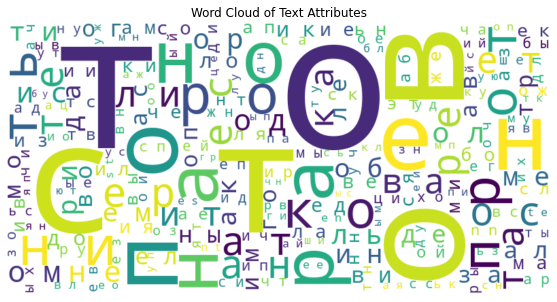

In [42]:
import nltk
nltk.download('stopwords')
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud



# Исследование базовых данных
print("Shape of the DataFrame:", df.shape)  # Получиаем количество строк и столбцов
print("Columns in the DataFrame:", df.columns)  # Получиаем имена столбцов
print("Data types of the columns:\n", df.dtypes)  # Получаем типы данных столбцов
print("Summary statistics of the DataFrame:\n", df.describe())  # Получаем сводную статистику

# Исследуем текстовые данные
# Выполняем задачи поиска текстовых данных, такие как подсчет слов, количество уникальных слов и т.д.
# Количество слов
df['word_count'] = df['text_post'].apply(lambda x: len(str(x).split()))
print("Word count statistics:\n", df['word_count'].describe())

# Количество уникальных слов
df['unique_word_count'] = df['text_post'].apply(lambda x: len(set(str(x).split())))
print("Unique word count statistics:\n", df['unique_word_count'].describe())

# Количество стоп-слов
stopwords_list = set(stopwords.words('russian'))  # Update with appropriate language
df['stopword_count'] = df['text_post'].apply(lambda x: len([word for word in str(x).lower().split() if word in stopwords_list]))
print("Stopword count statistics:\n", df['stopword_count'].describe())

# Визуализация данных
# Используя различные библиотеки построения графиков, такие как Matplotlib и WordCloud, для визуализации текстовых данных
# Примеры графиков:
# Облако слов
text = ' '.join(str(df['text_post'].values))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Attributes')
plt.show()

Как видно, разведочный анализ показвает, что в тексте мнодество стом слов. В среднем примерно 1200 слов в каждом посте при этом окло 400 стоп-слов в кажом посте.

# Выявяем и обработываем пропуски данных 

Посмотрим наличик пустых значений и визуализируем

In [43]:
df.isna().sum()

name_post                  1
difficulty_post            1
reading_time_post          1
views_count_post           1
tags_post                  1
text_post                  1
name_company               1
rating_company             1
desc_company               1
category_list_company      1
about_company              1
info                     333
refs                     332
refs_quant               332
word_count                 0
unique_word_count          0
stopword_count             0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

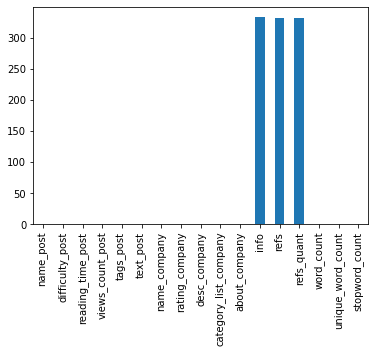

In [44]:
import matplotlib.pyplot as plt

df.isna().sum().plot(kind='bar')
plt.show

# Выбираем методы предварительной обработки данных

Так как мы работаем с текстовыми данными необходимо для них выполнить:

очистку данных

удаление стоп-слов

леммитизацию

векторизацию

Для отсальных колонок:

числа представленные в виде типа object перевести в численный вид данных

кодировать категории для дальшейшего обучения моделей

# Удаляем все лишние символы, кроме букв из текстов публикаций, Выполняем токенизацию текстов публикаций, Выполняем лемматизация текстов публикаций, Выполняем удаление спецсимволов из текстов публикаций, Удаляем все стоп-слова в тектах публикаций

В представленном коде используются несколько алгоритмов для предобработки текстов:

Удаление цифр: re.sub(r'\d+', '', text) - это регулярное выражение, которое удаляет все цифры из текста.

Удаление знаков пунктуации: re.sub(r'[^\w\s]', '', text) - это регулярное выражение, которое удаляет все знаки пунктуации из текста, кроме букв и пробелов.

Удаление лишних пробелов: re.sub(r'\s+', ' ', text) - это регулярное выражение, которое заменяет последовательности из одного или более пробелов одним пробелом.

Удаление стоп-слов: text = [word for word in text.split() if word not in stop_words] - это код, который удаляет стоп-слова из текста. Список стоп-слов загружается из библиотеки NLTK с использованием stopwords.words('russian').

In [74]:
import string
def text_preprocessing(text):
    stop_words = set(stopwords.words('russian'))
    exclude = set(string.punctuation)

    text = text.rstrip().lower()
    text = re.sub(r'\n',' ', text) # удалить /n
    text = re.sub(r'\d+', '', text) # удалить цифры
    text = re.sub(r'[^\w\s]', '', text)# убрать знаки препинания
    text = re.sub(r'\s+', ' ', text) # удалите лишние пробелы
    text = [word for word in text.split() if word not in stop_words] # Удаляем стоп-слова

    return text
sentences = list(df['text_post'].apply(text_preprocessing))

AttributeError: 'float' object has no attribute 'rstrip'

Создание биграм и триграм: Phrases из библиотеки Gensim используется для создания моделей биграм и триграм на основе предобработанных текстов. Минимальное количество вхождений (min_count) и порог (threshold) используются для настройки этих моделей.

Обновление столбца 'text_post' с предобработанным текстом: df['text_bigram_trigram'] = sentences - это код, который обновляет столбец 'text_bigram_trigram' в DataFrame df с предобработанным текстом, полученным после применения всех алгоритмов предобработки.

In [75]:
df.head()

name_post  \
0                                                    Стажировка в Авито глазами стажёра   
1                           Атомик дизайн-митап — буквы, цвета, форма, команда и деньги   
2                                                            Развитие стажёра через OKR   
3                                       Avito Product Analytics Meetup 9 декабря: анонс   
4  Тесты на знание Python, PHP, Golang и DevOps: разбор викторины AvitoQuiz на Highload   

  difficulty_post reading_time_post views_count_post  \
0  No label found                 6               13   
1  No label found                 3              2.5   
2  No label found                 4              6.7   
3  No label found                 3              3.1   
4  No label found                 3               19   

                                                                                                                 tags_post  \
0                                 [Блог компании AvitoTech , Учебный процесс в IT , Карьера в IT-индустрии , IT-компании ]   
1  [Блог компании AvitoTech , Работа с векторной графикой *, Дизайн мобильных приложений *, Графический дизайн *, Дизайн ]   
2                                               [Блог компании AvitoTech , Учебный процесс в IT , Карьера в IT-индустрии ]   
3                         [Блог компании AvitoTech , Big Data *, Хранилища данных *, Управление продуктом *, Конференции ]   
4            [Блог компании AvitoTech , Разработка веб-сайтов *, Занимательные задачки , Программирование *, Конференции ]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

Визуализируем результат

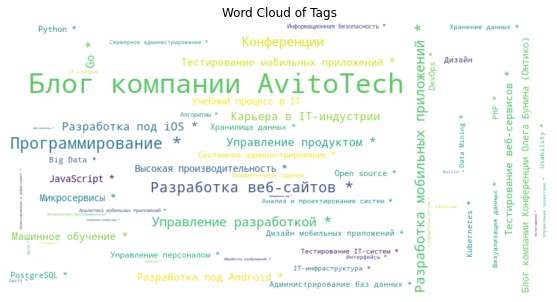

TypeError: argument of type 'float' is not iterable

In [47]:
from collections import Counter
# Создаем облако тегов
tags = df['tags_post'].explode()
tags_counter = Counter(tags)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tags_counter)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tags')
plt.show()

# Создаем облако категорий
categories = df['category_list_company'].explode()
categories_counter = Counter(categories)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(categories_counter)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Categories')
plt.show()

In [48]:
!pip install pymorphy2

In [49]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from pymorphy2 import MorphAnalyzer

In [55]:
#Удалены все лишние символы, кроме букв из текстов публикаций
def remove_special_chars(text):
    """
    Remove special characters and digits from text.
    """
    return re.sub(r'[^а-яА-Я\s]', '', text)

#Удалены все стоп-слова в тектах публикаций
def remove_stopwords(text):
    """
    Remove stop words from text.
    """
    stop_words = stopwords.words('russian')
    return ' '.join([word for word in text.split() if word not in stop_words])

# Выполнена лемматизация текстов публикаций
def lemmatize(text):
    """
    Lemmatize text using pymorphy2.
    """
    morph = MorphAnalyzer()
    return ' '.join([morph.parse(word)[0].normal_form for word in text.split()])

In [56]:
# Применяем функцию remove_special_chars() к столбцу с именем 'text_column'
df['text_clear'] = df['text_post'].apply(remove_special_chars)

# Применяем функцию remove_stopwords() к столбцу с именем 'text_column'
df['text_clear'] = df['text_clear'].apply(remove_stopwords)

# Применяем lemmatize() к столбцу с именем 'text_column'
df['text_clear'] = df['text_clear'].apply(lemmatize)

TypeError: expected string or bytes-like object

In [57]:
import nltk
nltk.download('punkt')  # Загружаем необходимые данные NLTK для токенизации

# Определяем функцию для обозначения русского текста с помощью NLTK
def tokenize_russian_text(text):
    tokens = nltk.word_tokenize(text, language='russian')
    return tokens

# Применяем функцию токенизации к столбцу "текст" во фрейме данных
df['tokens'] = df['text_clear'].apply(tokenize_russian_text)

# Отображаем результирующий фрейм данных
df.head()
[nltk_data] Downloading package punkt to /Users/mac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!

SyntaxError: invalid syntax (Temp/ipykernel_1692/2503346645.py, line 14)

In [60]:
!python3 -m spacy download ru_core_news_sm
!pip3 install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

Python was not found but can be installed from the Microsoft Store: ms-windows-store://pdp/?productid=9NJ46SX7X90P


  Using cached spacy-3.5.2-cp39-cp39-win_amd64.whl (12.2 MB)
  Using cached langcodes-3.3.0-py3-none-any.whl (181 kB)
  Using cached preshed-3.0.8-cp39-cp39-win_amd64.whl (96 kB)
  Using cached thinc-8.1.9-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached pydantic-1.10.7-cp39-cp39-win_amd64.whl (2.2 MB)
  Using cached catalogue-2.0.8-py3-none-any.whl (17 kB)
  Using cached srsly-2.4.6-cp39-cp39-win_amd64.whl (482 kB)
  Using cached wasabi-1.1.1-py3-none-any.whl (27 kB)
  Using cached cymem-2.0.7-cp39-cp39-win_amd64.whl (30 kB)
  Using cached spacy_loggers-1.0.4-py3-none-any.whl (11 kB)
  Using cached typer-0.7.0-py3-none-any.whl (38 kB)
  Using cached murmurhash-1.0.9-cp39-cp39-win_amd64.whl (18 kB)
  Using cached pathy-0.10.1-py3-none-any.whl (48 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl (29 kB)
  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Using cached confection-0.0.4-py3-none-any.whl (32 kB)
  Using cached blis-0.7.9-cp39-cp39-win_amd64.whl (7.0 

ERROR: Could not install packages due to an OSError: [WinError 5] Отказано в доступе: 'c:\\programdata\\anaconda3\\lib\\site-packages\\__pycache__\\typing_extensions.cpython-39.pyc'
Consider using the `--user` option or check the permissions.



In [ ]:
import spacy
nlp = spacy.load("ru_core_news_sm")

In [ ]:
# Загружаем данные в dataframe
# Определяем функцию для выполнения тегов частей речи и выделения значимых частей речи
def highlight_pos(text):
    doc = nlp(text)
    highlighted_text = ""
    for token in doc:
        if token.pos_ in ["NOUN", "VERB"]:   # Определяем значимые части речи
            highlighted_text += f"{token.text} " # Добавляем HTML-теги для выделения
    return highlighted_text

# Применяем функцию к столбцу маркированного текста во фрейме данных

df["highlighted_text"] = df["text_clear"].apply(highlight_pos)

# Распечатываем обновленный фрейм данных
df.head()